In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Merging all Files

In [ ]:
csv_folder = r'C:\Users\vp532\OneDrive\Desktop\Network Intrusion'

data_frames = []

# Loop through all files and read them as DataFrames
for file in os.listdir(csv_folder):
    if file.endswith('.csv'):
        file_path = os.path.join(csv_folder, file)
        print(f"Loading: {file}")
        
        df = pd.read_csv(file_path, low_memory=False)
       
        data_frames.append(df)

merged_df = pd.concat(data_frames, ignore_index=True)
print(f"\nTotal records after merging: {len(merged_df)}")
merged_df.to_csv('merged_CIC_IDS2017.csv', index=False)
print("\nMerged CSV saved as 'merged_CIC_IDS2017.csv'")

Loading: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Loading: Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Loading: Friday-WorkingHours-Morning.pcap_ISCX.csv
Loading: merged_CIC_IDS2017.csv
Loading: Monday-WorkingHours.pcap_ISCX.csv
Loading: Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Loading: Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Loading: Tuesday-WorkingHours.pcap_ISCX.csv
Loading: Wednesday-workingHours.pcap_ISCX.csv

Total records after merging: 5661486


KeyboardInterrupt: 

EDA

In [2]:
df=pd.read_csv("merged_CIC_IDS2017.csv")

In [3]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484460 entries, 0 to 2484459
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [5]:
df.columns = df.columns.str.strip()  
#Strips extra spaces

In [6]:
print(df.columns.tolist())


['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

In [7]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [8]:
df.shape

(2484460, 79)

In [9]:
df.describe().transpose()

C:\Users\vp532\AppData\Roaming\Python\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\vp532\AppData\Roaming\Python\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
Destination Port,2484460.0,8.456397e+03,1.828439e+04,0.0,53.0,80.0,2001.0,65535.0
Flow Duration,2484460.0,1.076579e+07,2.887209e+07,-13.0,88.0,30830.0,1302429.0,119999993.0
Total Fwd Packets,2484460.0,8.986730e+00,7.571178e+02,1.0,1.0,2.0,4.0,219759.0
Total Backward Packets,2484460.0,1.010019e+01,1.012025e+03,0.0,1.0,2.0,4.0,291922.0
Total Length of Fwd Packets,2484460.0,5.600840e+02,1.021646e+04,0.0,6.0,48.0,96.0,12900000.0
...,...,...,...,...,...,...,...,...
Active Min,2484460.0,6.572211e+04,6.043385e+05,0.0,0.0,0.0,0.0,110000000.0
Idle Mean,2484460.0,4.357075e+06,1.459903e+07,0.0,0.0,0.0,0.0,120000000.0
Idle Std,2484460.0,7.739348e+05,5.850879e+06,0.0,0.0,0.0,0.0,76600000.0
Idle Max,2484460.0,4.910276e+06,1.646156e+07,0.0,0.0,0.0,0.0,120000000.0


In [10]:
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])


Missing values per column:
Flow Bytes/s    241
dtype: int64


In [11]:
df = df.dropna()
print("\nShape after dropping missing values:", df.shape)


Shape after dropping missing values: (2484219, 79)


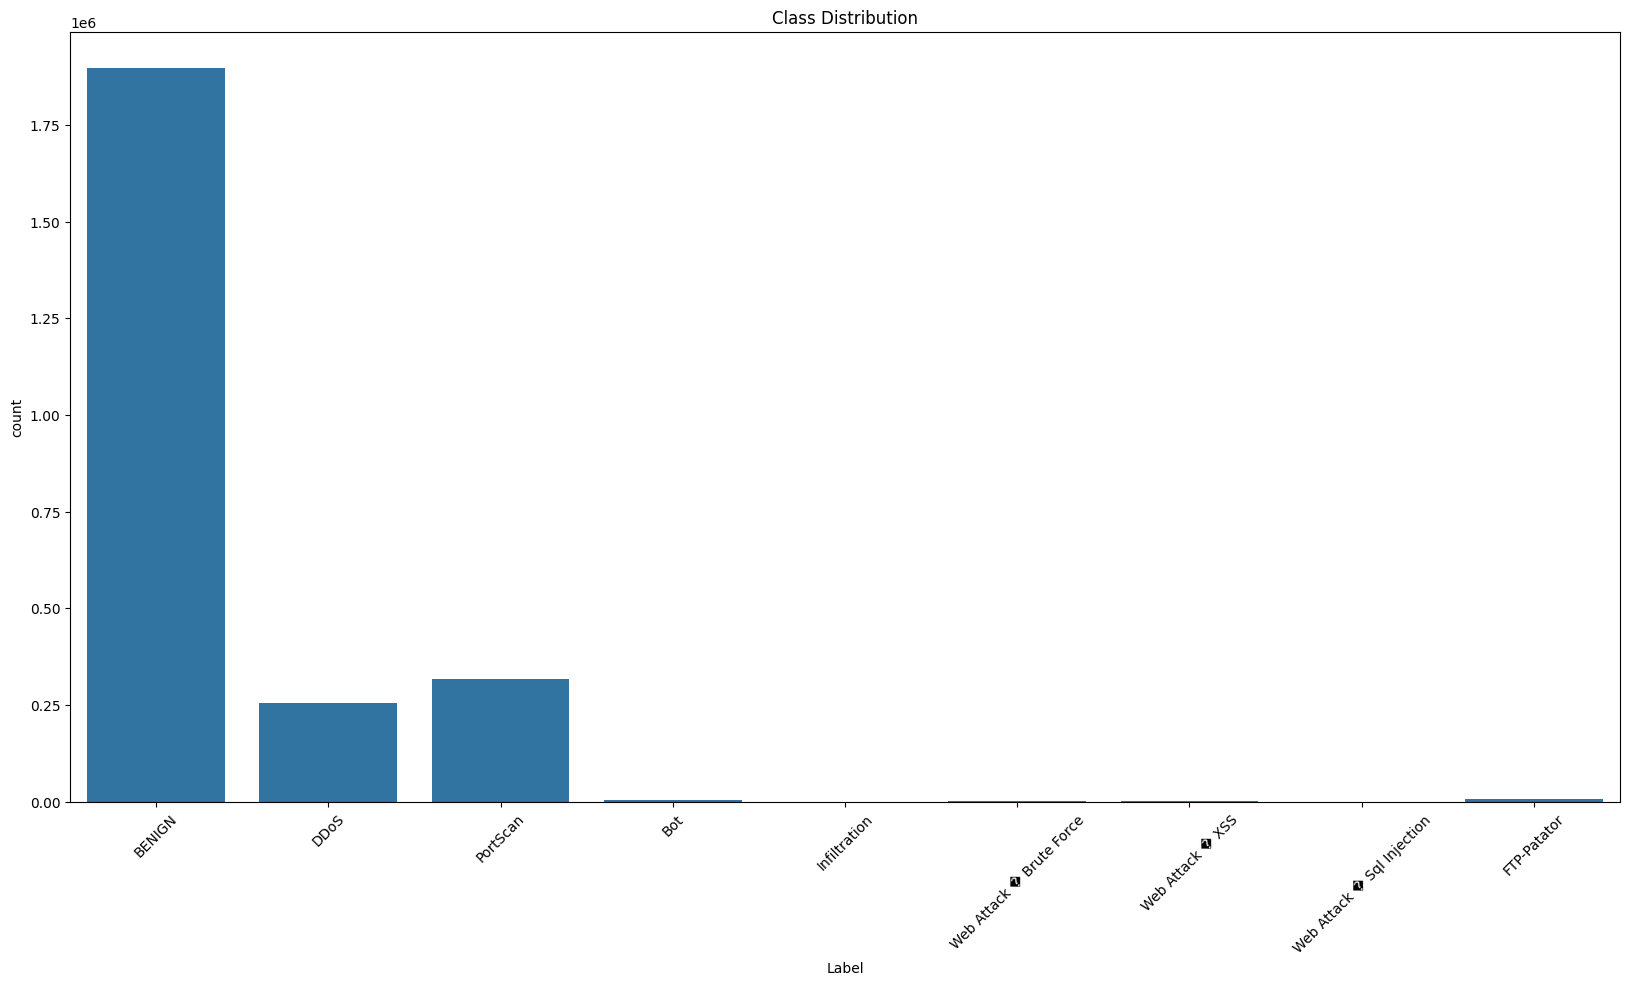

In [12]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Label', data=df)
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

In [13]:
df['Label'].describe()

count     2484219
unique          9
top        BENIGN
freq      1896236
Name: Label, dtype: object

In [14]:
print(df['Label'].value_counts())

Label
BENIGN                        1896236
PortScan                       317860
DDoS                           256054
FTP-Patator                      7921
Bot                              3932
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Name: count, dtype: int64


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(1605112, 79)

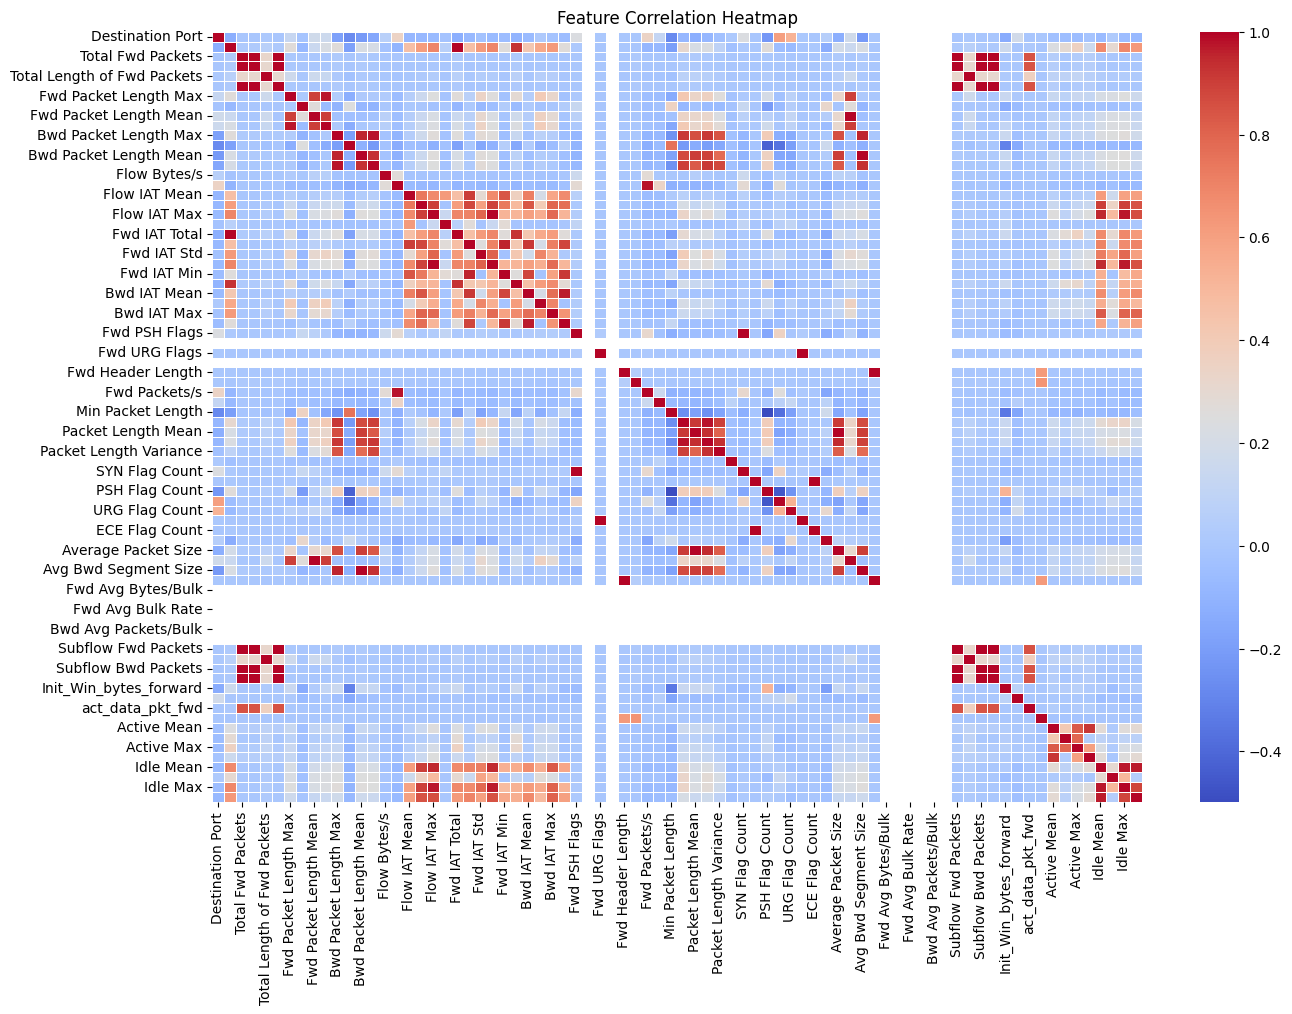

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove non-numeric columns (e.g., 'Label' if it's categorical)
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Label_encoded'] = le.fit_transform(df['Label'])
df_onehot = pd.get_dummies(df, columns=['Label'])

In [19]:
print(df['Label'].head())

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object


In [20]:
df['Label_encoded'].value_counts()

Label_encoded
0    1376226
2     128016
5      90819
3       5919
1       1953
6       1470
8        652
4         36
7         21
Name: count, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the 'Label' column
df['Label_encoded'] = le.fit_transform(df['Label'])

# Check the results
print(df[['Label', 'Label_encoded']].head())


    Label  Label_encoded
0  BENIGN              0
1  BENIGN              0
2  BENIGN              0
3  BENIGN              0
4  BENIGN              0


In [22]:
print(df['Label'].head())

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object


In [23]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label_encoded
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [24]:
df.drop(columns=['Label'], inplace=True)


In [25]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [26]:
num_unique_values = df['Label_encoded'].nunique()
print(num_unique_values)

9


SMOTE

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming df is your preprocessed dataset
X = df.drop(columns=['Label_encoded'])  # Drop target variable
y = df['Label_encoded']  # Target variable

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert infinite values to NaN and drop NaN values (without inplace=True)
X_train_cleaned = X_train.replace([np.inf, -np.inf], np.nan).dropna()
y_train_cleaned = y_train.loc[X_train_cleaned.index]  # Ensure alignment

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' balances all classes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_cleaned, y_train_cleaned)

# Print new class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))


Class distribution after SMOTE: Counter({0: 1100337, 5: 1100337, 2: 1100337, 3: 1100337, 6: 1100337, 8: 1100337, 1: 1100337, 4: 1100337, 7: 1100337})


Negative values

In [28]:
import pandas as pd

# Convert numeric columns to appropriate data type (ignores errors for non-numeric columns)
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Count negative values in each column
negative_counts = (df_numeric < 0).sum()

# Filter columns that have negative values
negative_columns = negative_counts[negative_counts > 0]

# Display columns with negative values and their counts
print("Columns with negative values and their counts:\n")
print(negative_columns)


Columns with negative values and their counts:

Flow Duration                  75
Flow Bytes/s                   64
Flow Packets/s                 75
Flow IAT Mean                  75
Flow IAT Max                   75
Flow IAT Min                 1813
Fwd IAT Min                     6
Fwd Header Length              28
Bwd Header Length              19
Fwd Header Length.1            28
Init_Win_bytes_forward     582392
Init_Win_bytes_backward    793392
min_seg_size_forward           28
dtype: int64


In [29]:
negative_columns = [
    "Flow Duration", "Flow Bytes/s", "Flow Packets/s", "Flow IAT Mean",
    "Flow IAT Max", "Flow IAT Min", "Fwd IAT Min", "Fwd Header Length",
    "Bwd Header Length", "Fwd Header Length.1", "Init_Win_bytes_forward",
    "Init_Win_bytes_backward", "min_seg_size_forward"
]

df[negative_columns] = df[negative_columns].applymap(lambda x: max(x, 0))


C:\Users\vp532\AppData\Local\Temp\ipykernel_8976\2372821248.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[negative_columns] = df[negative_columns].applymap(lambda x: max(x, 0))


In [30]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(), inplace=True)

In [31]:
print((df[negative_columns] < 0).sum())  # Should print 0 for all columns


Flow Duration              0
Flow Bytes/s               0
Flow Packets/s             0
Flow IAT Mean              0
Flow IAT Max               0
Flow IAT Min               0
Fwd IAT Min                0
Fwd Header Length          0
Bwd Header Length          0
Fwd Header Length.1        0
Init_Win_bytes_forward     0
Init_Win_bytes_backward    0
min_seg_size_forward       0
dtype: int64


Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Label_encoded'])  # Features
y = df['Label_encoded']  # Target variable

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (1284089, 78)
Testing Features Shape: (321023, 78)
Training Labels Shape: (1284089,)
Testing Labels Shape: (321023,)


Feature Scaling

In [33]:
print(np.isinf(X_train).sum().sum())  # Count of infinite values in X_train
print(np.isinf(X_test).sum().sum())   # Count of infinite values in X_test


0
0


In [34]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)


In [35]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [36]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature scaling complete.")

Feature scaling complete.


Logistic Regression

In [66]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Ensure X_test has no inf or NaN values
X_test_cleaned = X_test.replace([np.inf, -np.inf], np.nan).dropna()
#Ensure alignment of y_test with X_test_cleaned
y_test_cleaned = y_test.loc[X_test_cleaned.index]

log_reg = LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

#Predictions
y_pred_log = log_reg.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", accuracy_log)
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

AttributeError: 'numpy.ndarray' object has no attribute 'replace'

In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert X_test to DataFrame if it's a NumPy array
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test)

# Ensure X_test has no NaN or Inf values
X_test_cleaned = X_test.replace([np.inf, -np.inf], np.nan).dropna()

# Ensure y_test aligns with X_test_cleaned
y_test_cleaned = pd.Series(y_test).reindex(X_test_cleaned.index).dropna()

# Re-align X_test_cleaned with y_test_cleaned to avoid shape mismatch
X_test_cleaned = X_test_cleaned.loc[y_test_cleaned.index]

# Initialize Logistic Regression model
log_reg = LogisticRegression(
    max_iter=100, solver='lbfgs', class_weight='balanced', random_state=42
)

log_reg.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_log = log_reg.predict(X_test_cleaned)

# Evaluation
accuracy_log = accuracy_score(y_test_cleaned, y_pred_log)
print("Logistic Regression Accuracy:", accuracy_log)
print("\nClassification Report:\n", classification_report(y_test_cleaned, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cleaned, y_pred_log))


C:\Users\vp532\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vp532\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\vp532\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this beh

Logistic Regression Accuracy: 0.04819353509091774

Classification Report:
               precision    recall  f1-score   support

         0.0       0.57      0.02      0.04     36001
         1.0       0.00      0.00      0.00         0
         2.0       0.41      0.09      0.15     25603
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.02      0.07      0.03      1475
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0

    accuracy                           0.05     63079
   macro avg       0.11      0.02      0.02     63079
weighted avg       0.49      0.05      0.08     63079


Confusion Matrix:
 [[  683   112  3058 23912  1665  2388  1808   826  1549]
 [    0     0     0     0     0     0     0     0     0]
 [  483    75  2258 17017  1161  1697  1194   609  1109]
 [    0     0     0     0    

Random Forest

In [38]:
# Convert NaN values to 0
X_train = np.nan_to_num(X_train, nan=0.0)
X_test = np.nan_to_num(X_test, nan=0.0)

# Replace infinite values with the maximum finite float
X_train[np.isinf(X_train)] = np.finfo(np.float32).max
X_test[np.isinf(X_test)] = np.finfo(np.float32).max


In [39]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)


In [41]:
# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train).sum().sum())
print("NaN values in X_test:", np.isnan(X_test).sum().sum())

# Check for infinite values
print("Infinite values in X_train:", np.isinf(X_train).sum().sum())
print("Infinite values in X_test:", np.isinf(X_test).sum().sum())


NaN values in X_train: 0
NaN values in X_test: 0
Infinite values in X_train: 0
Infinite values in X_test: 0


In [42]:
print(pd.DataFrame(X_train).describe())
print(pd.DataFrame(X_test).describe())


                 0             1             2             3             4   \
count  1.284089e+06  1.284089e+06  1.284089e+06  1.284089e+06  1.284089e+06   
mean   7.859098e-09 -7.426855e-10  8.021004e-11 -2.094373e-10 -1.455664e-10   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -4.703960e-01 -3.944539e-01 -1.137313e-02 -1.070915e-02 -4.609236e-02   
25%   -4.676477e-01 -3.944476e-01 -1.137313e-02 -9.833513e-03 -4.519915e-02   
50%   -4.662476e-01 -3.929033e-01 -1.020123e-02 -8.957875e-03 -4.177517e-02   
75%   -4.419797e-01 -3.219124e-01 -7.857442e-03 -7.206599e-03 -3.604373e-02   
max    2.927891e+00  3.544226e+00  2.575222e+02  2.556073e+02  9.601566e+02   

                 5             6             7             8             9   \
count  1.284089e+06  1.284089e+06  1.284089e+06  1.284089e+06  1.284089e+06   
mean   2.183495e-10  2.560780e-09 -6.339564e-09 -1.390307e-09  8.962729e-09   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.

In [43]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# Check max and min values for extreme values
print("X_train max values:\n", X_train_df.max())
print("\nX_train min values:\n", X_train_df.min())

print("\nX_test max values:\n", X_test_df.max())
print("\nX_test min values:\n", X_test_df.min())

X_train max values:
 0       2.927891
1       3.544226
2     257.522186
3     255.607315
4     960.156616
         ...    
73    177.112000
74      7.825584
75     14.386170
76      7.057702
77      8.235765
Length: 78, dtype: float32

X_train min values:
 0    -0.470396
1    -0.394454
2    -0.011373
3    -0.010709
4    -0.046092
        ...   
73   -0.106895
74   -0.307406
75   -0.124444
76   -0.307376
77   -0.285987
Length: 78, dtype: float32

X_test max values:
 0       2.927839
1       3.544226
2     256.231934
3     255.027634
4      95.742241
         ...    
73    163.675034
74      7.825584
75     14.044387
76      7.057702
77      8.235765
Length: 78, dtype: float32

X_test min values:
 0    -0.470396
1    -0.394454
2    -0.011373
3    -0.010709
4    -0.046092
        ...   
73   -0.106895
74   -0.307406
75   -0.124444
76   -0.307376
77   -0.285987
Length: 78, dtype: float32


In [44]:
X_train = np.clip(X_train, -1e5, 1e5)
X_test = np.clip(X_test, -1e5, 1e5)


In [45]:
#X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
#X_test.dropna(inplace=True)
#y_test = y_test.loc[X_test.index]

X_test = np.where(np.isinf(X_test), np.nan, X_test)  # Replace inf with NaN
mask = ~np.isnan(X_test).any(axis=1)  # Keep only non-NaN rows
X_test = X_test[mask]
y_test = y_test[mask]  # Ensure y_test remains aligned


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Ensure X_test has no NaN or Inf values
X_test_cleaned = X_test.replace([np.inf, -np.inf], np.nan).dropna()
# Ensure y_test aligns with X_test_cleaned
y_test_cleaned = y_test.loc[X_test_cleaned.index]

rf_model = RandomForestClassifier(n_estimators=100, max_features="sqrt",class_weight="balanced",max_depth=20, random_state=42, n_jobs=-1)
rf_model.fit(X_train_resampled, y_train_resampled)
#predictions
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

AttributeError: 'numpy.ndarray' object has no attribute 'replace'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert X_test to DataFrame if it's a NumPy array
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test)

# Ensure X_test has no NaN or Inf values
X_test_cleaned = X_test.replace([np.inf, -np.inf], np.nan).dropna()

# Ensure y_test aligns with X_test_cleaned
y_test_cleaned = pd.Series(y_test).reindex(X_test_cleaned.index).dropna()

# Re-align X_test_cleaned with y_test_cleaned to avoid shape mismatch
X_test_cleaned = X_test_cleaned.loc[y_test_cleaned.index]

# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100, max_features="sqrt", class_weight="balanced", 
    max_depth=20, random_state=42, n_jobs=-1
)

rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_rf = rf_model.predict(X_test_cleaned)

# Evaluation
accuracy_rf = accuracy_score(y_test_cleaned, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("\nClassification Report:\n", classification_report(y_test_cleaned, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cleaned, y_pred_rf))


In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()


NameError: name 'y_pred_rf' is not defined

Feature Importance Analysis Random Forest

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from Random Forest
feature_importance = rf_model.feature_importances_

# Create a DataFrame to visualize
feat_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_importance_df['Feature'][:10], feat_importance_df['Importance'][:10], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()  # Highest importance at top
plt.show()


NameError: name 'rf_model' is not defined

XG Boost

In [ ]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 3.3 MB/s eta 0:00:38
   ---------------------------------------- 0.6/124.9 MB 6.4 MB/s eta 0:00:20
   ---------------------------------------- 1.2/124.9 MB 9.7 MB/s eta 0:00:13
   ---------------------------------------- 1.3/124.9 MB 6.8 MB/s eta 0:00:19
   ---------------------------------------- 1.5/124.9 MB 6.3 MB/s eta 0:00:20
    --------------------------------------- 1.9/124.9 MB 6.8 MB/s eta 0:00:19
   - -------------------------------------- 4.7/124.9 MB 14.4 MB/s eta 0:00:09
   - -------------------------------------- 5.4/124.9 MB 16.3 MB/s eta 0:00:08
   -- ------------------------------------- 8.7/124.9 MB 20.6 MB/s eta 0:00:06
   --- ------------------------------------ 10.1/124.9 MB 22.2 MB/s eta 0:00:06
   --- ------------------------------------ 11.0/124.9 MB 25.1 MB/s eta 0:00:05
   --- ------------------------------------ 11.8/124.9 MB 34.4 

In [67]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ensure X_test has no NaN or Inf values
X_test_cleaned = X_test.replace([np.inf, -np.inf], np.nan).dropna()
# Ensure y_test aligns with X_test_cleaned
y_test_cleaned = y_test.loc[X_test_cleaned.index]

xgb_model = XGBClassifier(n_estimators=200, max_depth=10,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,random_state=42,eval_metric="mlogloss")

xgb_model.fit(X_train_resampled, y_train_resampled)

#predictions 
y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


AttributeError: 'numpy.ndarray' object has no attribute 'replace'

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert X_test to DataFrame if it's a NumPy array
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test)

# Ensure X_test has no NaN or Inf values
X_test_cleaned = X_test.replace([np.inf, -np.inf], np.nan).dropna()

# Ensure y_test aligns with X_test_cleaned
y_test_cleaned = pd.Series(y_test).reindex(X_test_cleaned.index).dropna()

# Re-align X_test_cleaned with y_test_cleaned to avoid shape mismatch
X_test_cleaned = X_test_cleaned.loc[y_test_cleaned.index]

# Initialize XGBoost model
xgb_model = XGBClassifier(
    n_estimators=200, max_depth=10, learning_rate=0.1,
    subsample=0.8, colsample_bytree=0.8, random_state=42, 
    eval_metric="mlogloss"
)

xgb_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_cleaned)

# Evaluation
accuracy_xgb = accuracy_score(y_test_cleaned, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("\nClassification Report:\n", classification_report(y_test_cleaned, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cleaned, y_pred_xgb))


KeyboardInterrupt: 

Feature Importance Analysis for XGBoost

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance
feature_importance = xgb_model.feature_importances_
features = X_train_resampled.columns  # Feature names

# Create DataFrame and sort by importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot feature importance
plt.figure(figsize=(10,5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features (XGBoost)")
plt.gca().invert_yaxis()
plt.show()